Image Classification Model Deployment 
(Indah Dwi S - dsindah87@students.unnes.ac.id)

sumber dataset : https://www.kaggle.com/sshikamaru/fruit-recognition

In [1]:
import zipfile,os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
import pandas as pd 
print(tf.__version__)

2.5.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
local_zip = '/content/drive/MyDrive/IDCamp 2021/fruit recognition.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/drive/MyDrive/IDCamp 2021/fruit recognition.zip' mode='r'>>

In [4]:
path='/content/train/train'

In [5]:
train_datagen= ImageDataGenerator(
                   rescale = 1./255,
                   rotation_range=20,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   validation_split=0.2,
                   fill_mode= 'nearest')
test_datagen= ImageDataGenerator( 
                   rescale = 1./255,
                   rotation_range=20,
                   shear_range=0.2,
                   zoom_range=0.2,
                   horizontal_flip=True,
                   validation_split=0.2,
                   fill_mode= 'nearest')

In [6]:
train_generator = train_datagen.flow_from_directory(
    path,
    target_size=(100,100),
    subset='training',
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
    path,
    target_size=(100,100),
    subset='validation',
    class_mode='categorical')

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [7]:
print(train_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax')
])

In [25]:
#akan digunakan callback
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nProses dihentikan. Akurasi telah mencapai 95%!")
      self.model.stop_training = True

callback = mycallback()

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy']) 

In [27]:
num_epoch = 100
history = model.fit(train_generator,
                    steps_per_epoch = 60,
                    epochs = num_epoch,
                    validation_data = validation_generator,
                    verbose = 1,
                    callbacks=callback)

Epoch 1/100
60/60 [==============================] - 59s 986ms/step - loss: 2.7570 - accuracy: 0.2104 - val_loss: 1.3923 - val_accuracy: 0.5254
Epoch 2/100
60/60 [==============================] - 59s 980ms/step - loss: 1.2188 - accuracy: 0.5776 - val_loss: 0.8050 - val_accuracy: 0.6980
Epoch 3/100
60/60 [==============================] - 58s 978ms/step - loss: 0.7843 - accuracy: 0.7276 - val_loss: 0.5302 - val_accuracy: 0.7977
Epoch 4/100
60/60 [==============================] - 58s 977ms/step - loss: 0.6485 - accuracy: 0.7667 - val_loss: 0.3572 - val_accuracy: 0.8831
Epoch 5/100
60/60 [==============================] - 58s 978ms/step - loss: 0.3967 - accuracy: 0.8604 - val_loss: 0.2089 - val_accuracy: 0.9256
Epoch 6/100
60/60 [==============================] - 58s 975ms/step - loss: 0.3300 - accuracy: 0.8839 - val_loss: 0.3370 - val_accuracy: 0.8730
Epoch 7/100
60/60 [==============================] - 58s 975ms/step - loss: 0.2528 - accuracy: 0.9172 - val_loss: 0.1497 - val_accuracy:

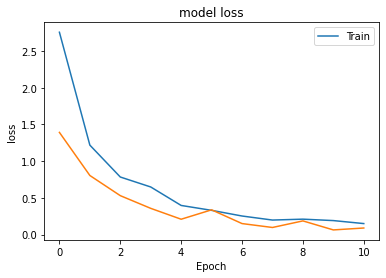

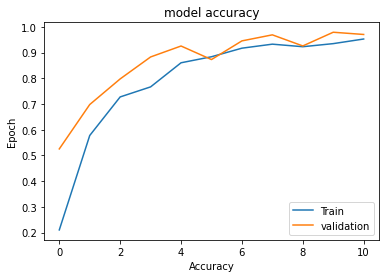

In [28]:
#plotting
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['Train', ],loc="upper right")
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Epoch")
plt.legend(['Train', 'validation'],loc="lower right")
plt.show()

Saving 0000.jpg to 0000.jpg
0000.jpg
[9]
Predict : Apple Granny Smith


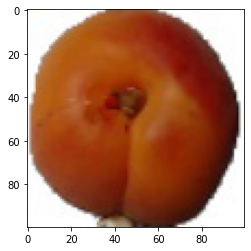

In [36]:
from tensorflow.keras.models import load_model

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100, 100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  if classes[0, 0] != 0:
    print('Predict : Apple Braeburn')
  else:
    print('Predict : Apple Granny Smith' )


###Save model tf.lite

In [37]:
convert = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model =convert.convert()

INFO:tensorflow:Assets written to: /tmp/tmphakfhuhp/assets


In [38]:
with tf.io.gfile.GFile('model.tflite','wb') as f:
  f.write(tflite_model)